<a href="https://colab.research.google.com/github/jessicamadridmejia/EIA-Diplomado-IA-Modulo4/blob/master/MetodosDeDesborrosificacion_2019_05_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 9.4MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.1-cp36-none-any.whl size=894065 sha256=6f732af7322c628ddf928291eb87db552bf00956e21e692255c48244c9018275
  Stored in directory: /root/.cache/pip/wheels/9d/f9/0e/a8de3e98e64bbf828f5e762936ff5a40e72331dbe663470711
Successfully built scikit-fuzzy


# **Métodos de desborrosificación**



*   Centroide:
*   Bisectriz:



5.0
5.0
5.0
7.0
3.0


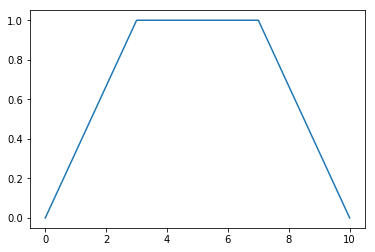

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from matplotlib import cm #importar color map de la librería matplot
from mpl_toolkits.mplot3d import Axes3D

X = np.linspace(0,10,21) # Universo del discurso del conjunto
A = fuzz.trapmf(X,[0,3,7,10])

plt.plot(X,A)

print(fuzz.defuzz(X,A,'centroid')) #desborrosificación por centroide
print(fuzz.defuzz(X,A,'bisector')) #desborrosificación por bisectriz
print(fuzz.defuzz(X,A,'mom')) #desborrosificación por media de los máximos (MOM)
print(fuzz.defuzz(X,A,'lom')) #desborrosificación por máximo de los máximos (LOM)
print(fuzz.defuzz(X,A,'som')) #desborrosificación por mínimo de los máximos (SOM)


3.727272727272728
3.3667504192892004
1.5
2.0
1.0


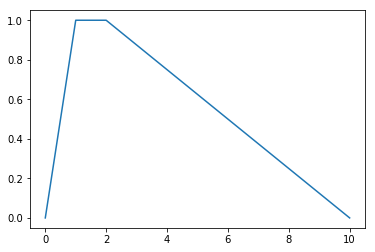

In [3]:
X = np.linspace(0,10,21) # Universo del discurso del conjunto
A = fuzz.trapmf(X,[0,1,2,10])

plt.plot(X,A)

print(fuzz.defuzz(X,A,'centroid')) #desborrosificación por centroide
print(fuzz.defuzz(X,A,'bisector')) #desborrosificación por bisectriz
print(fuzz.defuzz(X,A,'mom')) #desborrosificación por media de los máximos (MOM)
print(fuzz.defuzz(X,A,'lom')) #desborrosificación por máximo de los máximos (LOM)
print(fuzz.defuzz(X,A,'som')) #desborrosificación por mínimo de los máximos (SOM)

Text(0, 0.5, 'Valor de membresía')

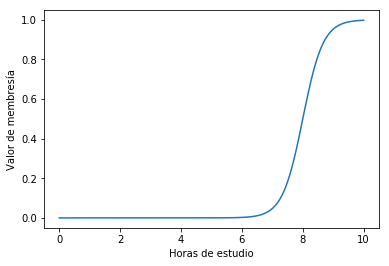

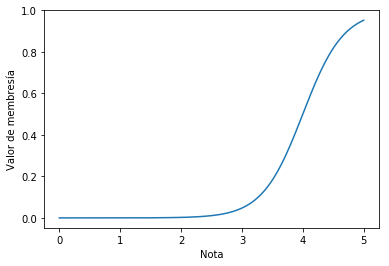

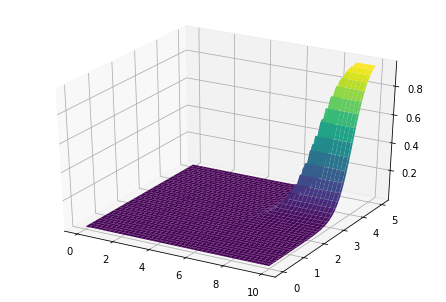

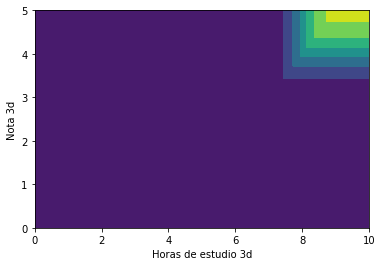

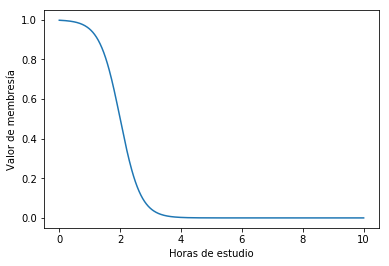

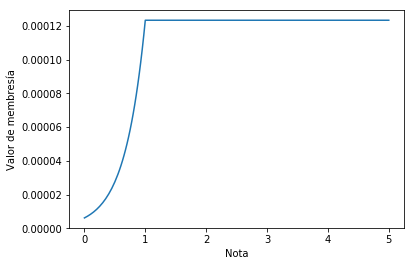

In [4]:
# Conjunto borroso estudiar mucho
X = np.linspace(0,10,501) # de 0 a 10 con 100 puntos
A = fuzz.sigmf(X,8,3) # 8 centro, 3 pendiente

plt.plot(X,A)
plt.xlabel('Horas de estudio')
plt.ylabel('Valor de membresía')

# Conjunto borroso estudiante excelente
Y = np.linspace(0,5,201) # de 0 a 10 con 100 puntos
B = fuzz.sigmf(Y,4,3)

plt.figure()
plt.plot(Y,B)
plt.xlabel('Nota')
plt.ylabel('Valor de membresía')

#Producto cartesiano entre A y B

R = np.zeros((501,201))

for f in range(501):
  for c in range(201):
    R[f][c] = min(A[f],B[c])
    




# Librería para gráficas 3D
from mpl_toolkits.mplot3d import Axes3D
#Librería de colores
from matplotlib import cm

#Capturo una gráfica 2D
fig = plt.figure()
# Le agrego un eje más (Eje Z)
ax = Axes3D(fig)
#Creo una malla de valores para la gráfica
x,y = np.meshgrid(X,Y)
#Grafico de la superficie
ax.plot_surface(x,y,R.transpose(),cmap=cm.viridis) # hace la traspuesta de R porque tiene las dimensiones al contrario de x y y

plt.figure()
plt.contourf(x,y,R.transpose()) #mapa de calor visto desde arriba
plt.xlabel('Horas de estudio 3d')
plt.ylabel('Nota 3d')

# Relación causa - efecto
#A medida que aumentan las horas de estudio aumenta la relación con excelente estudiante


# COMPOSICIÓN

# Conjunto borroso Mery estudia poco
AP = fuzz.sigmf(X,2,-3)

plt.figure()
plt.plot(X,AP)
plt.xlabel('Horas de estudio')
plt.ylabel('Valor de membresía')

#pythonhosted.org

# Calculo la composición
C = fuzz.maxmin_composition(AP.transpose(),R)[0]

plt.figure()
plt.plot(Y,C)
plt.xlabel('Nota')
plt.ylabel('Valor de membresía')

#nivel de veracidad de que Mery es buena estudiante 0.00012 (sexta grafica)

In [5]:
#Nota de Mery aplicando métodos de desborrosificación

print(fuzz.defuzz(Y,C,'centroid')) #desborrosificación por centroide
print(fuzz.defuzz(Y,C,'bisector')) #desborrosificación por bisectriz
print(fuzz.defuzz(Y,C,'mom')) #desborrosificación por media de los máximos (MOM)
print(fuzz.defuzz(Y,C,'lom')) #desborrosificación por máximo de los máximos (LOM)
print(fuzz.defuzz(Y,C,'som')) #desborrosificación por mínimo de los máximos (SOM)

2.8325554482440256
2.8415476745139054
3.0
5.0
1.0


(501,)
(501, 201)
2.5000000000000036
2.499999999999992
2.5
5.0
0.0


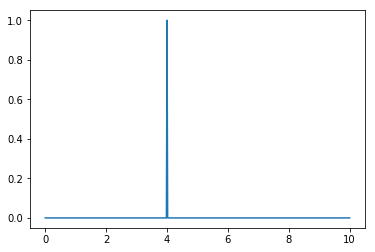

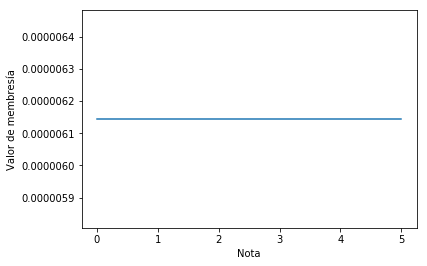

In [6]:
# Función de membresía - Singleton

AP = np.zeros(501)
AP[X==4] = 1 #poner 1 en la posición 4 (a) 

plt.plot(X,AP)
print(AP.shape)
print(R.shape)

# Calculo la composición
C = fuzz.maxmin_composition(AP.transpose(),R)[0]

plt.figure()
plt.plot(Y,C)
plt.xlabel('Nota')
plt.ylabel('Valor de membresía')

print(fuzz.defuzz(Y,C,'centroid')) #desborrosificación por centroide
print(fuzz.defuzz(Y,C,'bisector')) #desborrosificación por bisectriz
print(fuzz.defuzz(Y,C,'mom')) #desborrosificación por media de los máximos (MOM)
print(fuzz.defuzz(Y,C,'lom')) #desborrosificación por máximo de los máximos (LOM)
print(fuzz.defuzz(Y,C,'som')) #desborrosificación por mínimo de los máximos (SOM)


Text(0, 0.5, 'Valor de membresía')

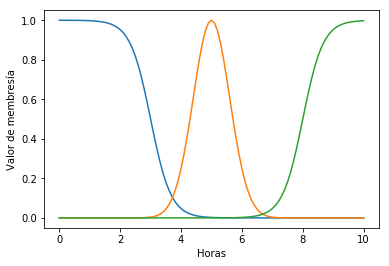

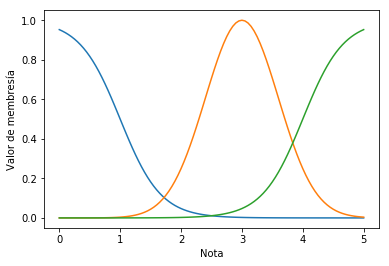

In [7]:
# Conjunto borroso estudiar 
X = np.linspace(0,10,101) # de 0 a 10 con 100 puntos
A1 = fuzz.sigmf(X,3,-3) # 3 centro, -3 pendiente
A2 = fuzz.gaussmf(X,5,0.6) # 5 centro, 3 desviación estandar
A3 = fuzz.sigmf(X,8,3) # 8 centro, 3 pendiente

plt.plot(X,A1)
plt.plot(X,A2)
plt.plot(X,A3)
plt.xlabel('Horas')
plt.ylabel('Valor de membresía')


# Conjunto borroso estudiante 
Y = np.linspace(0,5,101) # de 0 a 10 con 100 puntos
B1 = fuzz.sigmf(Y,1,-3) # 4 centro, 3 pendiente
B2 = fuzz.gaussmf(Y,3,0.6) # 5 centro, 3 desviación estandar
B3 = fuzz.sigmf(Y,4,3) # 3 centro, -3 pendiente

plt.figure()
plt.plot(Y,B1)
plt.plot(Y,B2)
plt.plot(Y,B3)
plt.xlabel('Nota')
plt.ylabel('Valor de membresía')

3.3227314922979603
3.586179745332832
4.750000000000001
5.0
4.5


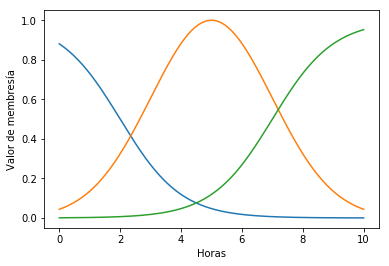

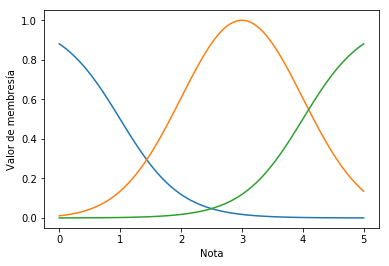

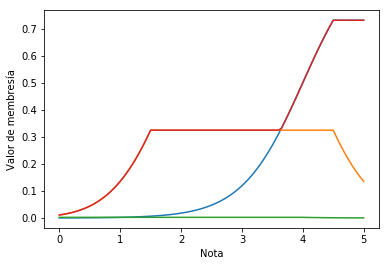

In [8]:
# Para horas de estudio
X = np.linspace(0,10,201)
A1 = fuzz.sigmf(X,2,-1)
A2 = fuzz.gaussmf(X,5,2)
A3 = fuzz.sigmf(X,7,1)

plt.plot(X,A1,X,A2,X,A3)
plt.xlabel('Horas')
plt.ylabel('Valor de membresía')


# Para nota
Y = np.linspace(0,5,101)
B1 = fuzz.sigmf(Y,1,-2)
B2 = fuzz.gaussmf(Y,3,1)
B3 = fuzz.sigmf(Y,4,2)

plt.figure()
plt.plot(Y,B1,Y,B2,Y,B3)
plt.xlabel('Nota')
plt.ylabel('Valor de membresía')

# Creo las relaciones para cada regla
R1 = np.zeros((X.size,Y.size))
R2 = np.zeros((X.size,Y.size))
R3 = np.zeros((X.size,Y.size))

# Calculo las relaciones por producto cartesiano
for f in range (X.size):
  for c in range (Y.size):
    R1[f][c] = min(A3[f],B3[c])
    R2[f][c] = min(A2[f],B2[c])
    R3[f][c] = min(A1[f],B1[c])
    
# Construyo el hecho    
AP = np.zeros(X.size)
#AP[X==3] = 1 # 4 horas de estudio
#AP[X==1] = 1 # 1 horas de estudio
AP[X==8] = 1 # 8 horas de estudio

# Calculo las composiciones entre AP y las relaciones (reglas)
C1 = fuzz.maxmin_composition(AP.transpose(),R1)[0]
C2 = fuzz.maxmin_composition(AP.transpose(),R2)[0]
C3 = fuzz.maxmin_composition(AP.transpose(),R3)[0]

#Grafico las composiciones
plt.figure()
plt.plot(Y,C1,Y,C2,Y,C3)
plt.xlabel('Nota')
plt.ylabel('Valor de membresía')

# Calculo la agregación de las reglas con la unión (Máximo)
CT = np.maximum(np.maximum(C1,C2),C3) # Composición total
plt.plot(Y,CT)

# Desborrosifico el conocimiento inferido
print(fuzz.defuzz(Y,CT,'centroid')) #desborrosificación por centroide
print(fuzz.defuzz(Y,CT,'bisector')) #desborrosificación por bisectriz
print(fuzz.defuzz(Y,CT,'mom')) #desborrosificación por media de los máximos (MOM)
print(fuzz.defuzz(Y,CT,'lom')) #desborrosificación por máximo de los máximos (LOM)
print(fuzz.defuzz(Y,CT,'som')) #desborrosificación por mínimo de los máximos (SOM)


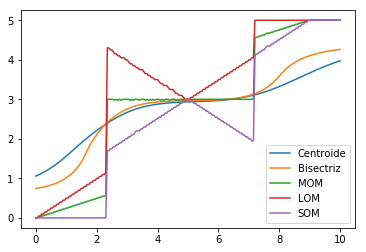

In [9]:
NTC = np.zeros(X.size)
NTB = np.zeros(X.size)
NTM = np.zeros(X.size)
NTL = np.zeros(X.size)
NTS = np.zeros(X.size)

#for i in range(0,10,0.5) # entre 0 y 10 horas con aumento de 0.5
for i in range(X.size):

  # Construyo el hecho    
  AP = np.zeros(X.size)
  AP[i] = 1 # i horas de estudio

  # Calculo las composiciones entre AP y las relaciones (reglas)
  C1 = fuzz.maxmin_composition(AP.transpose(),R1)[0]
  C2 = fuzz.maxmin_composition(AP.transpose(),R2)[0]
  C3 = fuzz.maxmin_composition(AP.transpose(),R3)[0]

  # Calculo la agregación de las reglas con la unión (Máximo)
  CT = np.maximum(np.maximum(C1,C2),C3) # Composición total
  
  # Desborrosifico el conocimiento inferido
  NTC[i] = fuzz.defuzz(Y,CT,'centroid') #desborrosificación por centroide
  NTB[i] = fuzz.defuzz(Y,CT,'bisector') #desborrosificación por bisectriz
  NTM[i] = fuzz.defuzz(Y,CT,'mom') #desborrosificación por media de los máximos (MOM)
  NTL[i] = fuzz.defuzz(Y,CT,'lom') #desborrosificación por máximo de los máximos (LOM)
  NTS[i] = fuzz.defuzz(Y,CT,'som') #desborrosificación por mínimo de los máximos (SOM)%%!
  
# Grafico cada método
plt.figure()
plt.plot(X,NTC,X,NTB,X,NTM,X,NTL,X,NTS)
plt.legend(('Centroide','Bisectriz','MOM','LOM','SOM'))


7.285911460064235


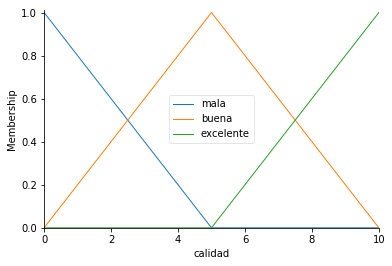

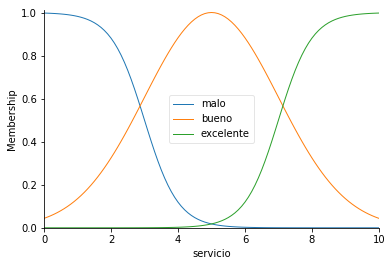

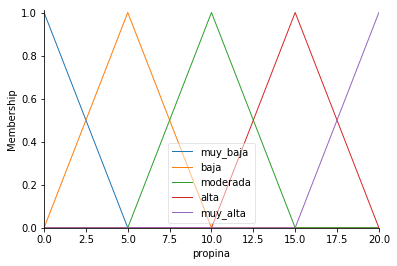

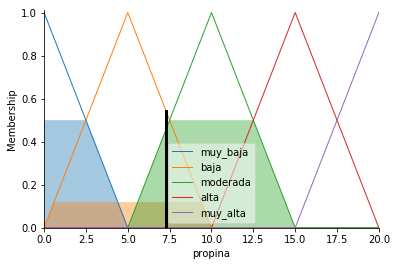

In [10]:
# sistema de inferencia borroso para la propina

from skfuzzy import control as fis # fuzzy inferest system

# Creo los antecedentes
calidad = fis.Antecedent(np.linspace(0,10,101),'calidad')
servicio = fis. Antecedent(np.linspace(0,10,101),'servicio')

# Creo el consecuente
#propina = fis.Consequent(np.linspace(0,20,201),'propina')
propina = fis.Consequent(np.linspace(0,20,201),'propina','centroid')

# Divido en U.D en 3 conjuntos igualmente espaciados
#calidad.automf(3)
calidad.automf(names=['mala','buena','excelente'])
calidad.view()

# Divido el Universo del discurso a mi gusto
servicio['malo'] = fuzz.sigmf(servicio.universe,3,-2)
servicio['bueno'] = fuzz.gaussmf(servicio.universe,5,2)
servicio['excelente'] = fuzz.sigmf(servicio.universe,7,2)

servicio.view()

#Divido el consecuente
#propina.automf(5)
propina.automf(names=['muy_baja','baja','moderada','alta','muy_alta'])

propina.view()

#Reglas del sistema & = and, | = or 
# , - entonces
R1 = fis.Rule(calidad['mala'] & servicio['malo'],propina['muy_baja'])
R2 = fis.Rule(calidad['mala'] & servicio['bueno'],propina['muy_baja'])
R3 = fis.Rule(calidad['mala'] & servicio['excelente'],propina['baja'])
R4 = fis.Rule(calidad['buena'] & servicio['malo'],propina['baja'])
R5 = fis.Rule(calidad['buena'] & servicio['bueno'],propina['moderada'])
R6 = fis.Rule(calidad['buena'] & servicio['excelente'],propina['moderada'])
R7 = fis.Rule(calidad['excelente'] & servicio['malo'],propina['baja'])
R8 = fis.Rule(calidad['excelente'] & servicio['bueno'],propina['alta'])
R9 = fis.Rule(calidad['excelente'] & servicio['excelente'],propina['muy_alta'])

reglas = fis.ControlSystem([R1,R2,R3,R4,R5,R6,R7,R8,R9])
tPropina = fis.ControlSystemSimulation(reglas)

tPropina.input['calidad'] = 2.5
tPropina.input['servicio'] = 4

tPropina.compute()

print(tPropina.output['propina'])

propina.view(sim=tPropina)

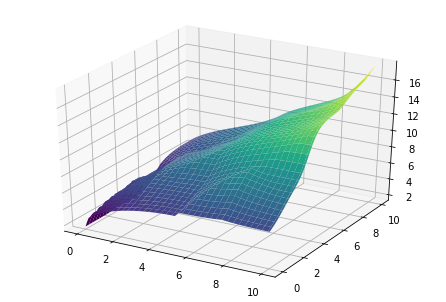

In [11]:
a = np.linspace(0,10,101)
b = np.linspace(0,10,101)

S = np.zeros((a.size,b.size))

for i in range(a.size):
  for j in range(b.size):
    tPropina.input['calidad'] = a[i]
    tPropina.input['servicio'] = b[j]
    
    tPropina.compute()
    
    S[i][j] = tPropina.output['propina']
    

x,y = np.meshgrid(a,b)    
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x,y,S.transpose(),cmap=cm.viridis)